In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [2]:
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [3]:
df.bedrooms.median()

4.0

In [4]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [6]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [7]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [8]:
reg.intercept_

221323.00186540408

In [9]:
reg.predict([[2500,4,5]])

E:\Anaconda\APP\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

In [11]:
112.06244194*2500+23388.88007794*4-3231.71790863*5+221323.00186540408

578876.0374840142

In [14]:
price = df.price
price

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [21]:
train = df.drop(['price'],axis=1)
train

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [23]:
p = reg.predict(train)
p

array([518217.63297611, 602590.07937407, 615307.4140366 , 597962.89583192,
       760663.42675457, 795258.55102673])

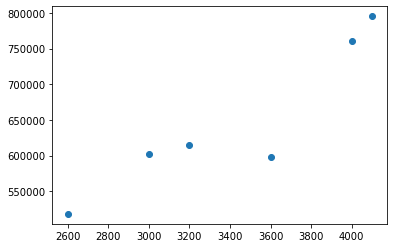

In [29]:
plt.scatter(df.area,p,marker='o')